<a href="https://colab.research.google.com/github/YASHGARG7004/Ml-project/blob/main/Breast_Cancer_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Objective Of This Project
The objective of this project is to develop a machine learning model to predict whether a breast tumor is malignant or benign based on diagnostic features. The dataset includes various medical attributes.

The aim is to build an accurate classification model that can assist medical professionals in early and reliable detection of breast cancer, thereby improving patient outcomes and treatment planning.


 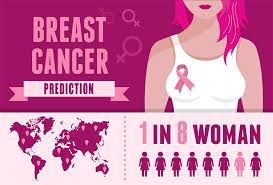

In [ ]:
# Important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score,f1_score

**Data Collection**

Use the Breast Cancer Wisconsin (Diagnostic) dataset,which includes various features like radius , texture , perimeter , smoothness , and area of cell nuclei.

In [ ]:
# Load the breast cancer dataset
DATA=pd.read_csv('Breast_cancer_data.csv')
DATA.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


**Data Analysis**

In [ ]:
DATA.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [ ]:
DATA.sample()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
334,12.3,19.02,77.88,464.4,0.08313,1


In [ ]:
DATA.shape

(569, 6)

In [ ]:
DATA.size

3414

**Information of Dataframe**

This code provides a summary of a Pandas DataFrame named 'DATA'.

In [ ]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [ ]:
DATA.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

**Checking for NaN values**

This code checks for any NaN (missing values) values in the DataFrame 'DATA' and sums up the count of NaN values in each column. Here's what it means:

In [ ]:
DATA.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

**Count Unique Value**

This code snippet counts the occurences of each unique value in the 'diagnosi' column of the DataFrame 'DATA'.

In [ ]:
DATA.diagnosis.value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [ ]:
Benign = DATA[DATA.diagnosis==0]
Malignant = DATA[DATA.diagnosis==1]

In [ ]:
print(Benign.shape)
print(Malignant.shape)

(212, 6)
(357, 6)


In [ ]:
Benign.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.0
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.0
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.0
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.0
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.0
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.0
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.0
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.0


In [ ]:
Malignant.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.0
mean,12.146524,17.914762,78.075406,462.790196,0.092478,1.0
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.0
min,6.981000,9.710000,43.790000,143.500000,0.052630,1.0
25%,11.080000,15.150000,70.870000,378.200000,0.083060,1.0
50%,12.200000,17.390000,78.180000,458.400000,0.090760,1.0
75%,13.370000,19.760000,86.100000,551.100000,0.100700,1.0
max,17.850000,33.810000,114.600000,992.100000,0.163400,1.0


In [ ]:
DATA.groupby('diagnosis').mean()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
diagnosis,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898
1,12.146524,17.914762,78.075406,462.790196,0.092478


**Visualization**

Create a bar plot using Seaborn and Matplotlib based o the count of unique values in the 'diagnosis' column of your DataFrame.

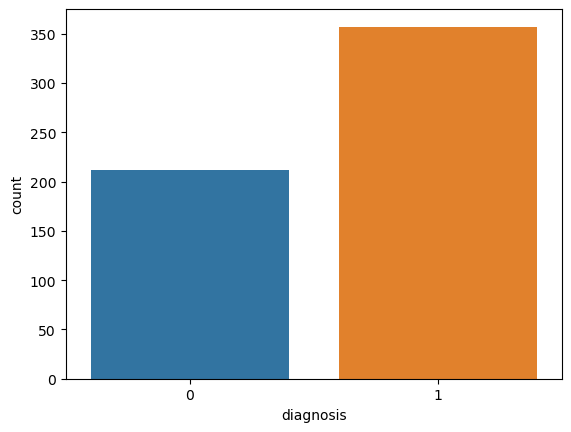

In [ ]:
sns.countplot(x=DATA.diagnosis,data=DATA)
plt.xlabel='diagnosis'
plt.ylabel='count'

**Visualizes the correlation**

In [ ]:
corr=DATA.corr()

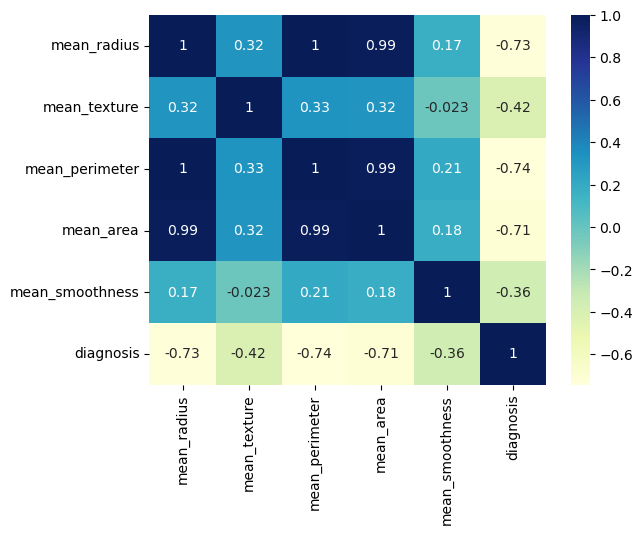

In [ ]:
sns.heatmap(corr,cmap='YlGnBu',annot=True)
plt.show()

**Data Splitting**

In [ ]:
X=DATA.drop(columns='diagnosis',axis=1)
Y=DATA['diagnosis']

In [ ]:
print(X)

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
0          17.99         10.38          122.80     1001.0          0.11840
1          20.57         17.77          132.90     1326.0          0.08474
2          19.69         21.25          130.00     1203.0          0.10960
3          11.42         20.38           77.58      386.1          0.14250
4          20.29         14.34          135.10     1297.0          0.10030
..           ...           ...             ...        ...              ...
564        21.56         22.39          142.00     1479.0          0.11100
565        20.13         28.25          131.20     1261.0          0.09780
566        16.60         28.08          108.30      858.1          0.08455
567        20.60         29.33          140.10     1265.0          0.11780
568         7.76         24.54           47.92      181.0          0.05263

[569 rows x 5 columns]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the dataset into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(569, 5) (455, 5) (114, 5)


In [ ]:
Y_train

560    1
428    1
198    0
203    0
41     0
      ..
299    1
534    1
493    1
527    1
168    0
Name: diagnosis, Length: 455, dtype: int64

In [ ]:
Y_test

528    1
291    1
467    1
108    0
340    1
      ..
471    1
449    0
24     0
38     0
230    0
Name: diagnosis, Length: 114, dtype: int64

**Model Selection**

Consider algorithms like Logistic Regression , Support Vector Machines , Naive Bayes , Decision Tree , KNeighborsClassifier and Random forest Classification for Classification.

In [ ]:
# Define the algorithms
models ={'Logistic Regression': LogisticRegression(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'SVM' : SVC(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'Naive_Bayes': GaussianNB(),
          'KNN': KNeighborsClassifier()
         }

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Evaluation Metrics**

Use accuracy , precision , recall , and F1-score to assess model performance.

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        45
           1       0.90      0.93      0.91        69

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114



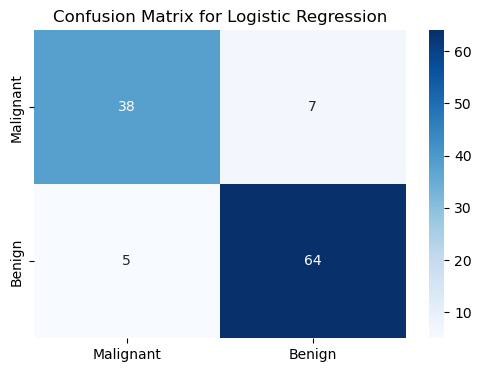

Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        45
           1       0.93      0.90      0.91        69

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.90      0.89      0.90       114



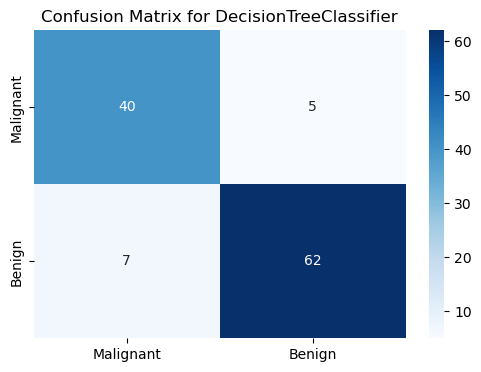

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        45
           1       0.86      0.93      0.90        69

    accuracy                           0.87       114
   macro avg       0.87      0.85      0.86       114
weighted avg       0.87      0.87      0.87       114



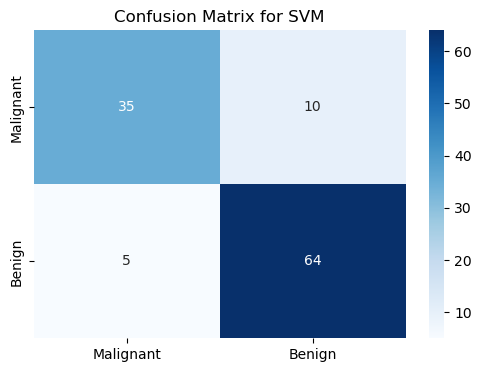

Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        45
           1       0.94      0.97      0.96        69

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



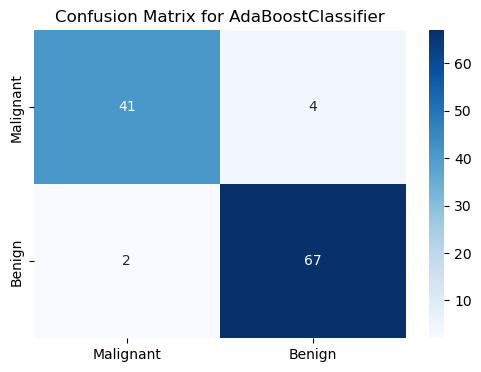

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        45
           1       0.93      0.94      0.94        69

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



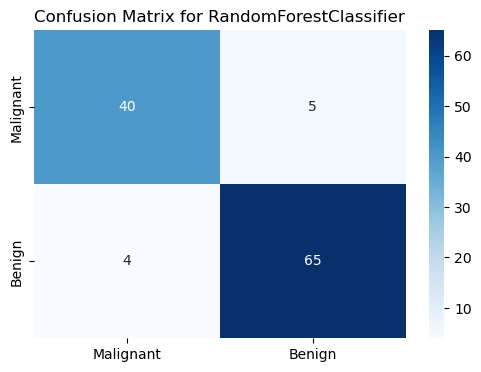

Classification Report for Naive_Bayes:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        45
           1       0.90      0.93      0.91        69

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114



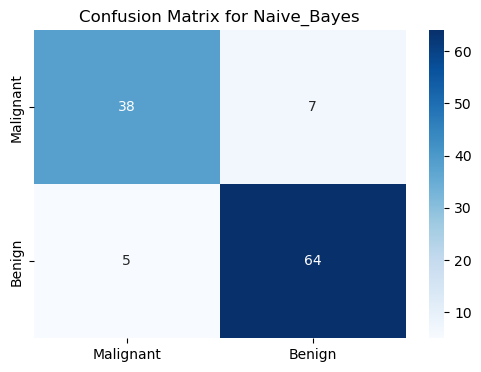

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        45
           1       0.86      0.90      0.88        69

    accuracy                           0.85       114
   macro avg       0.85      0.84      0.84       114
weighted avg       0.85      0.85      0.85       114



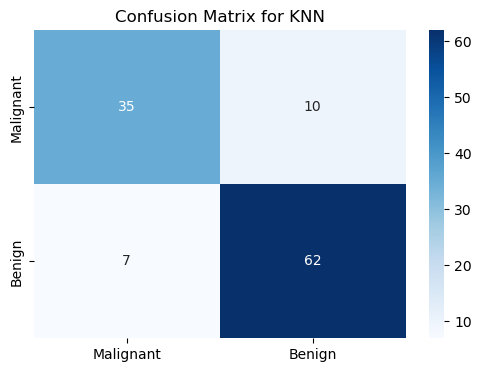

In [ ]:
# Initialize a dictionary to hold result
result = {}
for name,model in models.items():
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)

# Calculate accuracy and F1 score
    accuracy = accuracy_score(Y_test,y_pred)
    f1  = f1_score(Y_test,y_pred)

# Store result
    result[name] = {'Accuracy': accuracy , 'f1-score': f1}

# Print Classification report
    print(f"Classification Report for {name}:")

    print(classification_report(Y_test,y_pred))

# Plot confusion matrics for all models
    cm = confusion_matrix(Y_test,y_pred)
    plt.figure(figsize = (6,4))
    sns.heatmap(cm,annot=True,cmap = 'Blues',xticklabels=['Malignant','Benign'],yticklabels = ['Malignant','Benign'])
    plt.title(f'Confusion Matrix for {name}')
    plt.show()


**Result**

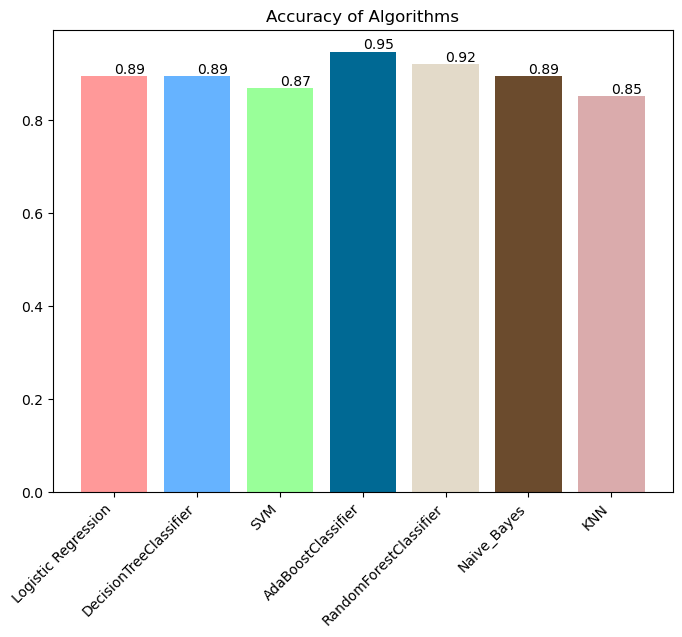

In [ ]:
# Visualize accuracy with sea bone colors and accuracy values on top
# Define sea bone colors for each bar
# Create bar chart
plt.figure(figsize=(8,6))
colors = ['#FF9999','#66B3FF','#99FF99','#006994','#E3DAC9','#6b4b2d','#daabac']
bars = plt.bar(result.keys(),[result[name]['Accuracy'] for name in result],color=colors)

# Add accuracy values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval,f'{yval:.2f}', va = 'bottom')

plt.title('Accuracy of Algorithms')
plt.xticks(rotation=45,ha = 'right')
plt.show()

In [ ]:
# Print the Overall results
print('Overall Results:')
for name , metrics in result.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
        print()

Overall Results:
Logistic Regression:
Accuracy: 0.8947

f1-score: 0.9143

DecisionTreeClassifier:
Accuracy: 0.8947

f1-score: 0.9118

SVM:
Accuracy: 0.8684

f1-score: 0.8951

AdaBoostClassifier:
Accuracy: 0.9474

f1-score: 0.9571

RandomForestClassifier:
Accuracy: 0.9211

f1-score: 0.9353

Naive_Bayes:
Accuracy: 0.8947

f1-score: 0.9143

KNN:
Accuracy: 0.8509

f1-score: 0.8794

